In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.sparse import csr_matrix

In [2]:
df = pd.read_json('amazonReviews.json', lines=True)

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012"


In [4]:
df = df[['reviewerID', 'reviewText']]

In [5]:
df.head()

,reviewerID,reviewText
0,A14CK12J7C7JRK,I purchased the Trilogy with hoping my two cat...
1,A39QHP5WLON5HV,There are usually one or more of my cats watch...
2,A2CR37UY3VR7BN,I bought the triliogy and have tested out all ...
3,A2A4COGL9VW2HY,My female kitty could care less about these vi...
4,A2UBQA85NIGLHA,"If I had gotten just volume two, I would have ..."


In [6]:
df['reviewText'] = df['reviewText'].str.lower()

In [7]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
             "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
             "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
             "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
             "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
             "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
             "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
             "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
             "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

index_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12,
              'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23,
              'x': 24, 'y': 25, 'z': 26, ' ': 27, '0': 28, '1': 29, '2': 30, '3': 31, '4': 32, '5': 33, '6': 34,
              '7': 35, '8': 36, '9': 37}
k = 5
r = 10
b = 40

In [8]:
# remove any punctuation marks, stop words(stop-words list), and converting the text to lower case
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df['reviewText'] = df['reviewText'].apply(lambda x: ''.join([word for word in list(x) if word.isalnum() or word.isspace()]))

In [9]:
df.index.shape 

(157836,)

In [10]:
# remove the empty review or the review only containing stop word and punctuations 
emptyIndex = []
for idx, data in df.iterrows():
    reviewText = data.reviewText
    if reviewText == '':
        emptyIndex.append(idx)
df = df.drop(emptyIndex)
df.index = range(df.index.size)   # reindex after dropping columns 

In [11]:
df.index.shape

(157681,)

In [12]:
# Shingle reviews
def shingle(string):
    if(len(string) < k):
        string = string + " "*(k-len(string))
    all_index = []
    for n in range(0, len(string) - k + 1):
        shingle = string[n:n + k]
        index = 0
        for e in range(len(shingle)):
            index += index_dict[shingle[e]] * np.power(37, k - e - 1)
        all_index.append(index)
    return all_index

In [13]:
df['5 shingles'] = df['reviewText'].apply(shingle)

In [14]:
df.head()

,reviewerID,reviewText,5 shingles
0,A14CK12J7C7JRK,purchased trilogy hoping two cats age 3 5 woul...,"[31075050, 40273539, 33897865, 6029784, 150701..."
1,A39QHP5WLON5HV,usually one cats watching tv staying trouble d...,"[40348586, 36674597, 39424931, 2499377, 231330..."
2,A2CR37UY3VR7BN,bought triliogy tested dvds appears volume 2 w...,"[4537133, 29186027, 39723671, 13552750, 160440..."
3,A2A4COGL9VW2HY,female kitty could care less videosbut cares l...,"[11516077, 10031112, 24431386, 2489852, 227805..."
4,A2UBQA85NIGLHA,gotten volume two would given five stars since...,"[13907047, 29153054, 38503670, 37756672, 10117..."


In [15]:
# Calculate Jaccard distance of reviews
def Jaccard_distance(lst1, lst2):
    intersection = []
    union = lst2
    for s in lst1:
        if s in lst2:
            intersection.append(s)
        else:
            union.append(s)
    return 1 - len(set(intersection)) / len(set(union))

The minimum Jaccard distance is 0.5933974091099039
The average Jaccard distance is 0.9570795719513593


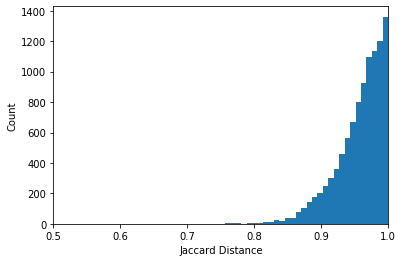

In [16]:
# Plot histogram of the Jaccard distance of 10,000 reviews
distance = []
np.random.seed(42)
for i in range(10000):
    x = np.random.randint(0, df['reviewerID'].size)
    y = np.random.randint(0, df['reviewerID'].size)
    while(x == y):
        y = np.random.randint(0,df['reviewerID'].size)
    x_review = df['5 shingles'][x]
    y_review = df['5 shingles'][y]
    d = Jaccard_distance(x_review, y_review)
    distance.append(d)
min_dis = min(distance)
aver_dis = np.average(distance)
print("The minimum Jaccard distance is", min_dis)
print("The average Jaccard distance is", aver_dis)
plt.xlabel('Jaccard Distance')
plt.ylabel('Count')
plt.xlim((0.5, 1.0))
plt.hist(distance, bins=50)
plt.show()

In [17]:
# Find the nearest neighbourof a review 

In [18]:
# Find prime number larger than n
def find_next_prime(n):
    for p in range(n, 2 * n):
        for i in range(2, p):
            if p % i == 0:
                break
            else:
                return p

In [19]:
# Generate random list
def arr_initia():
    a_lst = np.random.randint(1, p + 1, r * b, dtype=int)
    b_lst = np.random.randint(1, p + 1, r * b, dtype=int)
    return a_lst, b_lst

In [20]:
# MinHash to get signature matrix 
def min_hash(shingle_df):
    sig_matrix = np.zeros((len(shingle_df), r * b), dtype=int)
    for i in range(len(shingle_df)):
        sig_col = np.multiply(np.ones(r * b, dtype=int), 37 ** k)
        for j in range(len(shingle_df[i])):
            temp = np.mod(np.add(np.multiply(a_lst, shingle_df[i][j]), b_lst), p)
            sig_col = np.minimum(temp, sig_col)
        sig_matrix[i] = sig_col
    return sig_matrix

In [21]:
# Locality sensitive hashing 
def LSH(sig_mtrx):
    result = list()
    temp_a = []
    temp_b = []
    for i in range(b):
        temp_a = a_lst[i * r: (i + 1) * r]
        temp_b = b_lst[i * r: (i + 1) * r]
        temp_dic = dict()
        for j in range(0, sig_mtrx.shape[0]):
            temp_d = sig_mtrx[j][i * r: (i + 1) * r]
            temp = np.mod(np.add(np.multiply(temp_a, temp_d), temp_b), p)
            temp_key = np.sum(temp)
            if temp_key in temp_dic:
                temp_dic[temp_key].append(j)
            else:
                temp_dic[temp_key] = [j]
        result.append(temp_dic)
    return result

In [22]:
p = find_next_prime(37 ** k)
a_lst, b_lst = arr_initia()

shingle_df = df['5 shingles']

sig_matrix = min_hash(shingle_df)
hash_band = LSH(sig_matrix)

In [23]:
def outputPairs(inputMaps):
    result = set()
    for i in range(0,len(inputMaps)):
        for key,pairs in inputMaps[i].items():
            if len(pairs) >= 2:
                for j in range(len(pairs)-1):
                    for k in range(j+1,len(pairs)):
                        if Jaccard_distance(shingle_df.loc[pairs[j]],shingle_df.loc[pairs[k]]) <=0.2 and (pairs[k],pairs[j]) not in result:  
                            result.add((pairs[j],pairs[k]))
                            #print('!')
    return result

In [24]:
similar = outputPairs(hash_band)

In [25]:
len(similar)

2843

In [26]:
# queried review and return its approximate nearest neighbor (reviewerId)

In [27]:
def query(string):
    index, distance = queryHelper(string)
    similarID = df['reviewerID'][index]
    similarText = df['reviewText'][index]
    if distance < 0.2:
        print("Found a similar pair at index %d, \nwith similarity %0.3f, reviewer ID: %s, \nreview text:\n %s" %(index,1-distance,similarID,similarText))
    else:
        print("No similar pairs with similarity > 0.8 found, the nearest neighbor is found at index %d, \nwith similarity %0.3f, reviewer ID: %s, \nreview text:\n %s"%(index,1-distance,similarID,similarText))
    return similarID

In [54]:
def queryHelper(string):
    r = 10
    b = 40
    string = string.lower()
    string = " ".join([word for word in string.split() if word not in (stopwords)])
    string = "".join([word for word in list(string) if word.isalnum() or word.isspace()])
    curSet = shingle(string)
    sig_review = np.multiply(np.ones(r * b, dtype=int), 37 ** k)
    for l in range(len(curSet)):
        temp = np.mod(np.add(np.multiply(a_lst, curSet[l]), b_lst), p)
        sig_review = np.minimum(temp, sig_review)
        
    result = set()
    for i in range(0,b):
        a = a_lst[i*r:i*r+r]
        b = b_lst[i*r:i*r+r]
        curMap = hash_band[i]
        curSlice = sig_review[i*r:i*r+r]
        curSum = np.sum(np.mod(np.add(b,np.multiply(a,curSlice)),p))
        if curSum in curMap:
            for number in curMap[curSum]:
                if jaccard(sig_matrix[number],sig_review) <= 0.2:
                    result.add(number)
    #Find the nearest neighbour 
    distance = 1
    cur = 0
    if len(result) != 0:
        for num in result:
            curDistance = jaccard(sig_matrix[number],sig_review)
            if curDistance < distance:
                distance = curDistance
                cur = num
        else:
            for i in range(len(df['5 shingles'])):
                curDistance = jaccard(set(sig_matrix[i][0:100]),set(sig_review[0:100]))
                if curDistance < distance:
                    distance = curDistance
                    cur = i
    return cur,distance          

In [55]:
def jaccard(set1,set2):
    count = 0
    if len(set1) < len(set2):
        smallSet = set1
        largeSet = set2
    else:
        smallSet = set2
        largeSet = set1
    for item in smallSet:
        if item in largeSet:
            count+=1
    return 1-count/(len(set1)+len(set2)-count)

In [56]:
review = "The dogs love playing with this. I have puppies as well as a 50 pound dog and they all love this toy. The size is great for all types of dogs."
query(review)

Found a similar pair at index 19669, 
with similarity 1.000, reviewer ID: A9NXTC0HTPSDO, 
review text:
 dogs love playing this puppies well 50 pound dog love toy size great types dogs


'A9NXTC0HTPSDO'

In [58]:
## writing the pairs to a .csv file
import csv 
with open('result.csv','w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=' ')
    counter = 1
    for pair in similar:
        resultwriter.writerow(["Pair"]+["No."]+[str(counter)])
        resultwriter.writerow(["Review"]+["Index:"]+[str(pair[0])]+[str(pair[1])])
        resultwriter.writerow(["Reviewer"]+["ID:"]+[str(df['reviewerID'][pair[0]])]+[str(df['reviewerID'][pair[1]])])
        resultwriter.writerow(["----------------------------------"])
        resultwriter.writerow(["First"]+["review:"])
        resultwriter.writerow([df['reviewText'][pair[0]]])
        resultwriter.writerow(["----------------------------------"])
        resultwriter.writerow(["Second"]+["review:"])
        resultwriter.writerow([df['reviewText'][pair[1]]])
        resultwriter.writerow(["----------------------------------"])
        resultwriter.writerow(["----------------------------------"])
        resultwriter.writerow(["----------------------------------"])
        counter+=1